In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from io import StringIO

from IPython.display import Image
import pydotplus

In [3]:
train_df = pd.read_csv('//mnt/c/Users/cesar/Downloads/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Porcentaje de muertes en hombres y mujeres

In [77]:
p_mujeres = len(train_df[(train_df['Sex']=='female')&(train_df['Survived']==1)])/len(train_df[(train_df['Sex']=='female')])
print(f'POrcentaje de mujeres que sobrevivieron {round(p_mujeres,2)}')

POrcentaje de mujeres que sobrevivieron 0.74


In [76]:
p_hombres = len(train_df[(train_df['Sex']=='male')&(train_df['Survived']==1)])/len(train_df[(train_df['Sex']=='male')])
print(f'POrcentaje de mujeres que sobrevivieron {round(p_hombres,2)}')

POrcentaje de mujeres que sobrevivieron 0.19


In [8]:
train_df[(train_df['Sex']=='male')&(train_df['Survived']==1)]['Sex']

17     male
21     male
23     male
36     male
55     male
       ... 
838    male
839    male
857    male
869    male
889    male
Name: Sex, Length: 109, dtype: object

In [9]:
train_df[train_df['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

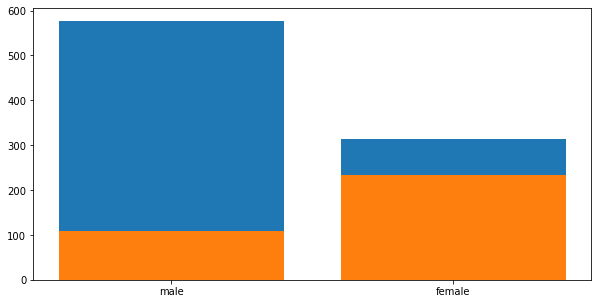

In [10]:
plt.figure(figsize=(10,5))
plt.bar(train_df['Sex'].value_counts().index,train_df['Sex'].value_counts().values)
plt.bar(train_df[train_df['Survived']==1]['Sex'].value_counts().index, train_df[train_df['Survived']==1]['Sex'].value_counts().values)
plt.show()

## Ver los supervivientes por clase

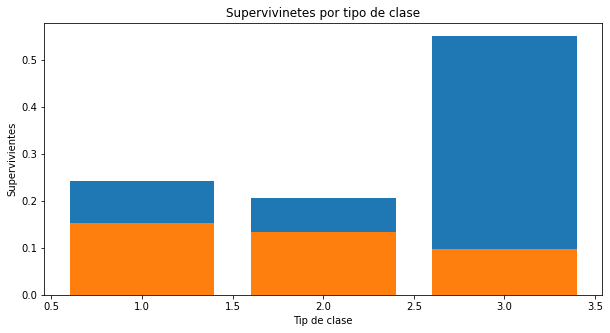

In [11]:
plt.figure(figsize=(10,5))
plt.bar(train_df['Pclass'].value_counts().sort_index().index,train_df['Pclass'].value_counts().sort_index().values/len(train_df['Pclass']))
plt.bar(train_df[train_df['Survived']==1]['Pclass'].unique(),train_df[train_df['Survived']==1]['Pclass'].value_counts().sort_index().values/len(train_df['Pclass']))
plt.xlabel('Tip de clase')
plt.ylabel('Supervivientes')
plt.title('Supervivinetes por tipo de clase')
plt.show()

In [12]:
train_df.groupby('Pclass').sum()['Survived']/ train_df.groupby('Pclass').count()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Ver los supervivientes por edad

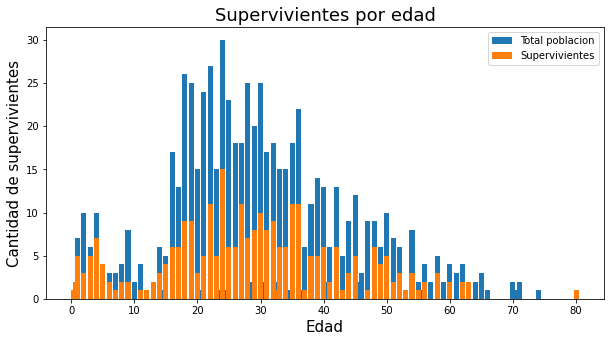

In [13]:
plt.figure(figsize=(10,5))
plt.bar(train_df['Age'].value_counts().sort_index().index,  train_df['Age'].value_counts().sort_index().values, label='Total poblacion')
plt.bar(train_df[train_df['Survived']==1]['Age'].value_counts().sort_index().index,  train_df[train_df['Survived']==1]['Age'].value_counts().sort_index().values, label='Supervivientes')
plt.ylabel('Cantidad de supervivientes',fontsize=15)
plt.xlabel('Edad',fontsize=15)
plt.title('Supervivientes por edad',fontsize=18)
plt.legend()

plt.show()

In [14]:
i_year = train_df[train_df['Survived']==1]['Age'].value_counts().sort_index()/train_df['Age'].value_counts().sort_index()

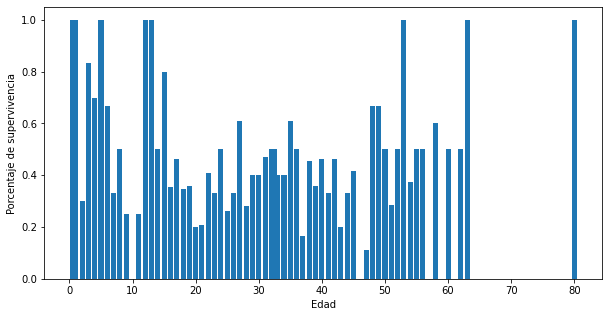

In [15]:
plt.figure(figsize=(10,5))
plt.bar(train_df['Age'].value_counts().sort_index().index,  i_year.fillna(0))
plt.xlabel('Edad')
plt.ylabel('Porcentaje de supervivencia')
plt.show()

## Supervivencia por tarifa

Text(0.5, 1.0, 'Number of survivors according to type of Embarked')

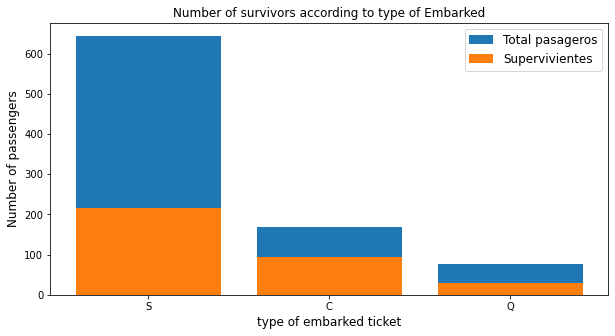

In [16]:
plt.figure(figsize=(10,5))
plt.bar(train_df['Embarked'].value_counts().index,train_df['Embarked'].value_counts().values,label='Total pasageros')
plt.bar(train_df[train_df['Survived'] == 1]['Embarked'].value_counts().index, train_df[train_df['Survived'] == 1]['Embarked'].value_counts().values,label='Supervivientes')
plt.legend(fontsize=12)
plt.ylabel('Number of passengers',fontsize=12)
plt.xlabel('type of embarked ticket',fontsize=12)
plt.title('Number of survivors according to type of Embarked')

## SIb Sp

In [17]:
# Grafica

In [18]:
df_sibsp_t = train_df.groupby('SibSp').count()['Survived'].reset_index()
df_sibsp_t.head()

,SibSp,Survived
0,0,608
1,1,209
2,2,28
3,3,16
4,4,18


In [19]:
df_sibsp = train_df.groupby('SibSp').sum()['Survived'].reset_index()
df_sibsp.head()

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3


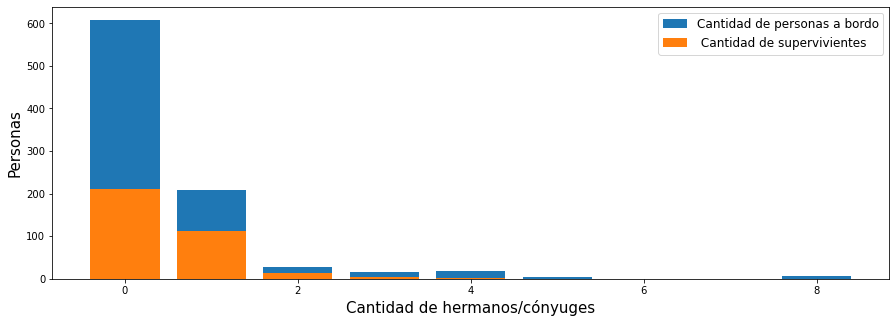

In [20]:
plt.figure(figsize=(15,5))
plt.bar(df_sibsp_t['SibSp'],df_sibsp_t['Survived'], label ='Cantidad de personas a bordo')
plt.bar(df_sibsp['SibSp'],df_sibsp['Survived'], label = ' Cantidad de supervivientes')
plt.legend(fontsize='large')
plt.xlabel('Cantidad de hermanos/cónyuges',fontsize= 15)
plt.ylabel('Personas',fontsize= 15)
plt.show()

In [21]:
sur_p_sibSp = df_sibsp['Survived']/df_sibsp_t['Survived']

In [22]:
df_sibSp_p = pd.DataFrame({'SibSp' : df_sibsp['SibSp'],'Survived':sur_p_sibSp})
df_sibSp_p.dtypes

SibSp         int64
Survived    float64
dtype: object

Cambiar a categorical

In [23]:
df_sibsp[['SibSp']] = df_sibsp[['SibSp']].applymap(lambda x : str(x))

In [24]:
df_sibsp_t[['SibSp']] = df_sibsp_t[['SibSp']].applymap(lambda x : str(x))

In [25]:
df_sibSp_p[['SibSp']] = df_sibSp_p[['SibSp']].applymap(lambda x : str(x))

Cambiar nombre de las columnas

In [26]:
df_sibSp_p

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
list_sibsp = [df_sibsp,df_sibsp_t,df_sibSp_p]

for i in list_sibsp:
    i.rename(columns={'SibSp':'hermanos/cónyuges','Survived':'Supervivientes'},inplace=True)

In [28]:
df_sibsp

,hermanos/cónyuges,Supervivientes
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


In [29]:
brush = alt.selection(type='interval')

In [30]:
points = alt.Chart(df_sibsp_t).mark_point().encode(
    x= 'hermanos/cónyuges',
    y = 'Supervivientes',
    color=alt.condition(brush, 'hermanos/cónyuges', alt.value('lightgray'))
).add_selection(
    brush
).properties(
    width= 700,
    title= 'Total pasageros'
)


bar = alt.Chart(df_sibsp).mark_bar().encode(
    y= 'hermanos/cónyuges:O',
    x = 'Supervivientes:Q',
    color = 'hermanos/cónyuges'
).transform_filter(
    brush
).properties(
    width= 700,
    title= 'pasageros que supervivieron'
)


bar2 = alt.Chart(df_sibSp_p).mark_bar().encode(
    y= 'hermanos/cónyuges:O',
    x= 'Supervivientes:Q',
    color = alt.Color('hermanos/cónyuges', legend=alt.Legend(title="hermanos/cónyuges"
))).transform_filter(
    brush
).properties(
    width= 700,
    title= 'Porcenjate de pasageron que supervivieron'
)

points & bar & bar2

alt.VConcatChart(...)

## Parch

In [31]:
train_df.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
df_parch = train_df.groupby('Parch').sum()['Survived'].reset_index()

In [33]:
train_df.Parch.dtypes

dtype('int64')

In [34]:
train_df.Parch.isna().sum()

0

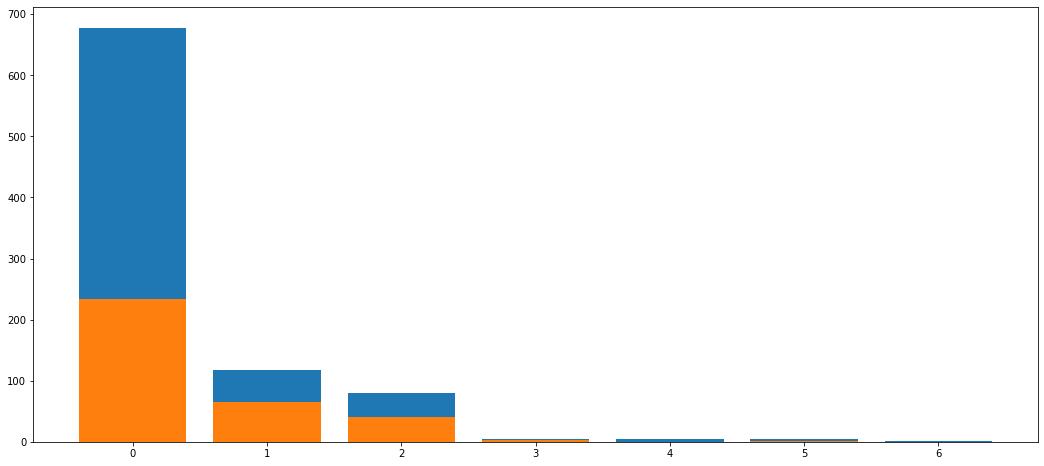

In [35]:
plt.figure(figsize=(18,8))
plt.bar(train_df.Parch.value_counts().index,train_df.Parch.value_counts().values)
plt.bar(df_parch['Parch'],df_parch['Survived'])
plt.show()

In [36]:
porcentae_parch = df_parch.Survived/train_df.Parch.value_counts().values

In [37]:
for idx,i in enumerate(porcentae_parch):
    print(f'El porcentaje de pasageron que tenían {idx} parents / children y sobrevivieron fue de {round(i,2)}')

El porcentaje de pasageron que tenían 0 parents / children y sobrevivieron fue de 0.34
El porcentaje de pasageron que tenían 1 parents / children y sobrevivieron fue de 0.55
El porcentaje de pasageron que tenían 2 parents / children y sobrevivieron fue de 0.5
El porcentaje de pasageron que tenían 3 parents / children y sobrevivieron fue de 0.6
El porcentaje de pasageron que tenían 4 parents / children y sobrevivieron fue de 0.0
El porcentaje de pasageron que tenían 5 parents / children y sobrevivieron fue de 0.25
El porcentaje de pasageron que tenían 6 parents / children y sobrevivieron fue de 0.0


## Fare

In [38]:
train_df[['Fare','Pclass']].isna().sum()

Fare      0
Pclass    0
dtype: int64

In [39]:
df_fare = train_df.groupby('Fare').sum()['Survived'].reset_index()

In [40]:
df_fare_t = train_df.groupby('Fare').count()['Survived'].reset_index()

In [41]:
df_fare.sort_values(by='Fare', ascending= False)

,Fare,Survived
247,512.3292,3
246,263.0000,2
245,262.3750,2
244,247.5208,1
243,227.5250,3
...,...,...
4,6.4375,0
3,6.2375,0
2,5.0000,0
1,4.0125,0


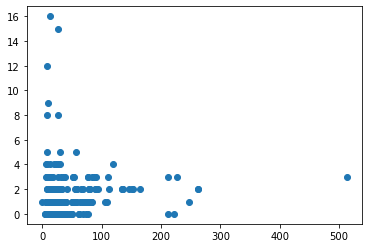

In [42]:
plt.scatter(df_fare['Fare'],df_fare['Survived'])

In [43]:
alt.Chart(df_fare).mark_bar().encode(
    x = 'Fare',
    y = 'Survived'
)

alt.Chart(...)

In [44]:
# POrcentaje de suoervivinetes
df_fare_p = df_fare['Survived']/df_fare_t['Survived']

In [45]:
a = pd.DataFrame({
    'Fare' : df_fare['Fare'],
    'Survived' : df_fare.Survived,
    'Total': df_fare_t.Survived,
    'Porcentaje': df_fare_p
                 }) 

In [46]:
a.sort_values(by='Porcentaje',ascending=False)

,Fare,Survived,Total,Porcentaje
247,512.3292,3,3,1.0
196,57.9792,2,2,1.0
89,13.8583,1,1,1.0
88,13.7917,1,1,1.0
86,13.4167,1,1,1.0
...,...,...,...,...
103,15.5500,0,1,0.0
180,47.1000,0,1,0.0
179,46.9000,0,6,0.0
178,42.4000,0,1,0.0


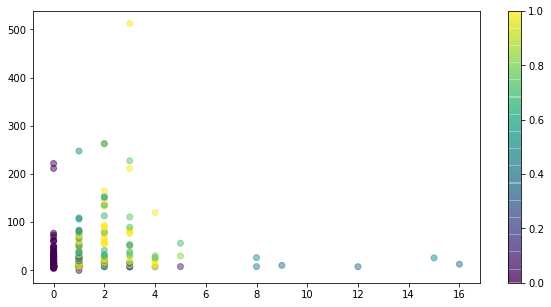

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(a.Survived , a.Fare, c = a.Porcentaje, alpha= 0.5)
plt.colorbar()

# Regression

In [48]:
regresion_df = train_df[['Pclass','Sex','Fare','Embarked','Survived','Parch','SibSp']] 

In [49]:
regresion_df = regresion_df.dropna()

In [50]:
X_train = regresion_df[['Pclass','Sex','Fare','Embarked','Parch','SibSp']] 
y_train = regresion_df['Survived']

In [51]:
y_train.isna().sum()

0

In [52]:
X_train.isna().sum()

Pclass      0
Sex         0
Fare        0
Embarked    0
Parch       0
SibSp       0
dtype: int64

## Limpiar y cambiar a numeric

In [53]:
X_train[['Sex']] = np.where(X_train.Sex=='male',1,0)
X_train['Embarked'].replace(to_replace=['S','C','Q'],value=[0,1,2],inplace= True)

<ipython-input-53-741b94435a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Sex']] = np.where(X_train.Sex=='male',1,0)
/home/cesarppz/anaconda3/envs/ia/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/cesarppz/anaconda3/envs/ia/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

## Aplicar la regresión

In [54]:
reg_log = LogisticRegression().fit(X=X_train,y=y_train)

In [55]:
test_df = pd.read_csv('//mnt/c/Users/cesar/Downloads/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
df_test = test_df[['Pclass','Sex','Fare','Embarked','PassengerId','Parch','SibSp']]

In [57]:
df_test.isna().sum()

Pclass         0
Sex            0
Fare           1
Embarked       0
PassengerId    0
Parch          0
SibSp          0
dtype: int64

In [58]:
df_test['Fare'] = df_test['Fare'].fillna(np.mean(df_test['Fare']))

<ipython-input-58-dbcd324923b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'] = df_test['Fare'].fillna(np.mean(df_test['Fare']))


In [59]:
X_test = df_test[['Pclass','Sex','Fare','Embarked','Parch','SibSp']] 

In [60]:
X_test[['Sex']] = np.where(X_test.Sex=='male',1,0)
X_test['Embarked'].replace(to_replace=['S','C','Q'],value=[0,1,2],inplace= True)

<ipython-input-60-d746a309d0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Sex']] = np.where(X_test.Sex=='male',1,0)
/home/cesarppz/anaconda3/envs/ia/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/cesarppz/anaconda3/envs/ia/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [61]:
X_test.dtypes

Pclass        int64
Sex           int64
Fare        float64
Embarked      int64
Parch         int64
SibSp         int64
dtype: object

In [62]:
y_predict = reg_log.predict(X_test)

In [63]:
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
result = {
    'ID':df_test.PassengerId,
    'result':y_predict,
}
r_df = pd.DataFrame(result)

In [65]:
r_df

,ID,result
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Descision Tree

In [66]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6)
clf.fit(X=X_train,y=y_train)
y2_predict = clf.predict(X_test)
y2_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

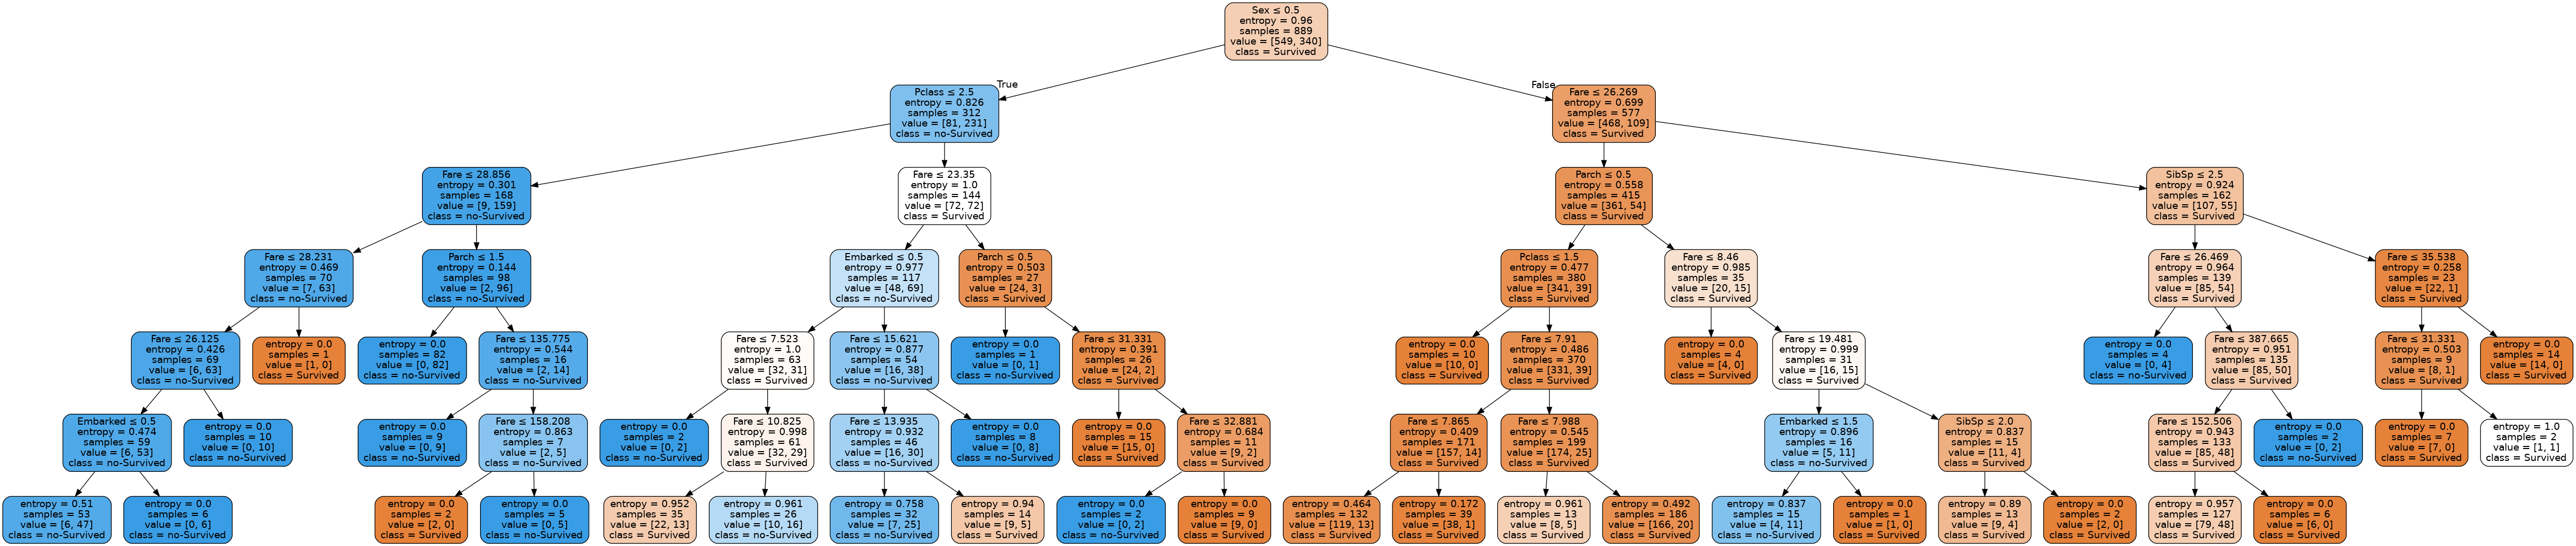

In [67]:
dot_data = StringIO()

#$Diselo de la función de visualización
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True ,special_characters = True, 
                feature_names = X_test.columns, class_names = ['Survived','no-Survived']
               )

# Definir el gráfico
graph = pydotplus.graph_from_dot_data( dot_data.getvalue() )

#Guardar la imagen generada
#graph.write_png('titanic_dt.png')

# Cargar la imagen
Image(graph.create_png())

In [68]:
result2 = {
    'PassengerId':df_test.PassengerId,
    'Survived':y2_predict,
}
r2_df = pd.DataFrame(result2)

In [69]:
r2_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
r2_df.to_csv('Dt_result.csv',index=False)